In [ ]:
#GIVEN THE BENCHMARK SUBMISSION: https://www.drivendata.co/blog/predict-flu-vaccine-data-benchmark/

In [ ]:
from pathlib import Path

import numpy as np
import pandas as pd

pd.set_option("display.max_columns", 100)

In [ ]:
DATA_PATH = Path.cwd().parent / "flu"

In [ ]:
features_df = pd.read_csv(
    DATA_PATH / "training_set_features.csv", 
    index_col="respondent_id"
)
labels_df = pd.read_csv(
    DATA_PATH / "training_set_labels.csv", 
    index_col="respondent_id"
)

In [ ]:
print("features_df.shape", features_df.shape)
features_df.info()
features_df.head()
features_df.describe() #shows summary of the numerical attributes
features_df.dtypes

features_df.shape (26707, 35)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null 

h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty           

In [ ]:
#propotion of missing values
null_count = features_df.isnull().sum()
null_percentage = round((features_df.isnull().sum()/features_df.shape[0])*100, 2)
null_df = pd.DataFrame({'column_name' : features_df.columns,'null_count' : null_count,'null_percentage': null_percentage})
null_df.reset_index(drop = True, inplace = True)
null_df.sort_values(by = 'null_percentage', ascending = False)

,column_name,null_count,null_percentage
34,employment_occupation,13470,50.44
33,employment_industry,13330,49.91
14,health_insurance,12274,45.96
25,income_poverty,4423,16.56
9,doctor_recc_h1n1,2160,8.09
10,doctor_recc_seasonal,2160,8.09
27,rent_or_own,2042,7.65
28,employment_status,1463,5.48
26,marital_status,1408,5.27
22,education,1407,5.27


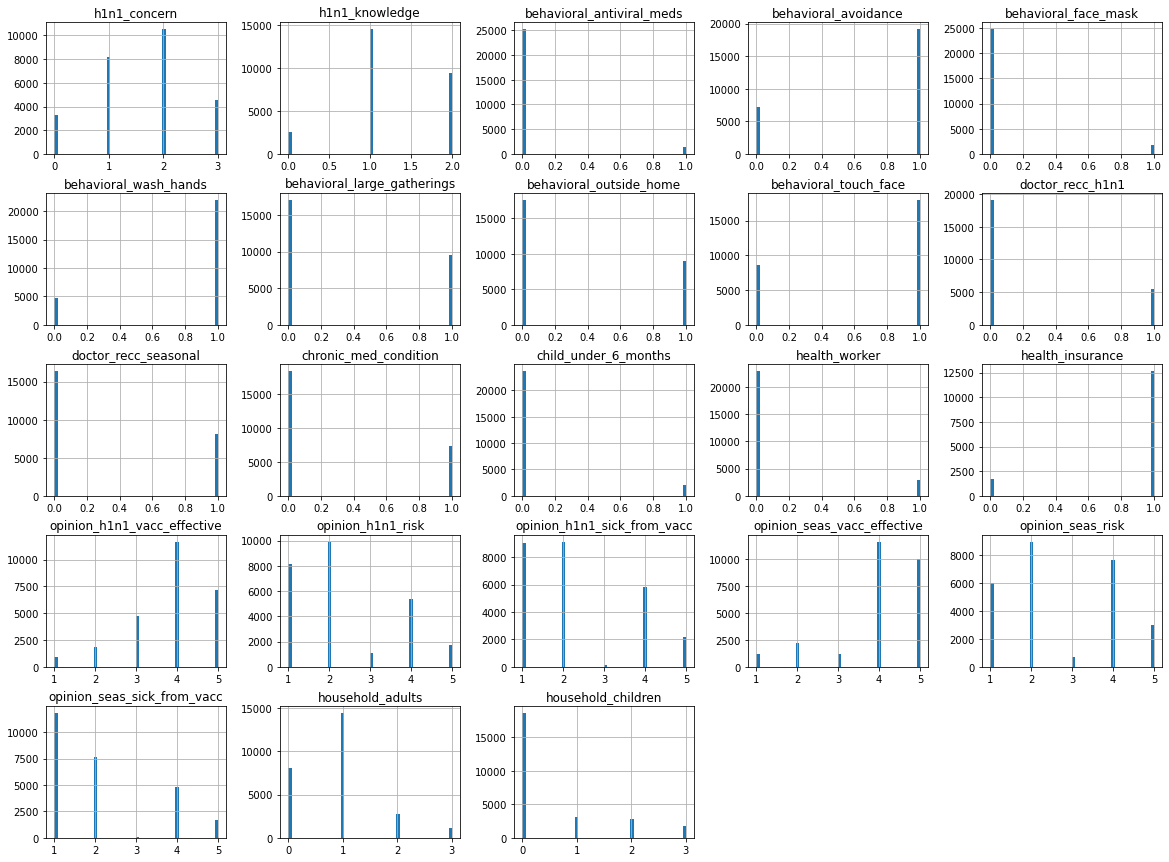

In [ ]:
#plot a histogram for each numerical attribute
%matplotlib inline  
import matplotlib.pyplot as plt
features_df.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
print("labels_df.shape", labels_df.shape)
labels_df.info()
labels_df.head()
labels_df.head()

labels_df.shape (26707, 2)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   h1n1_vaccine      26707 non-null  int64
 1   seasonal_vaccine  26707 non-null  int64
dtypes: int64(2)
memory usage: 625.9 KB


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


In [ ]:
np.testing.assert_array_equal(features_df.index.values, labels_df.index.values)

In [ ]:
#The assertion ran, and nothing happened. That's good, it means there is no problem. If the two index arrays were not the same, there would be an error.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

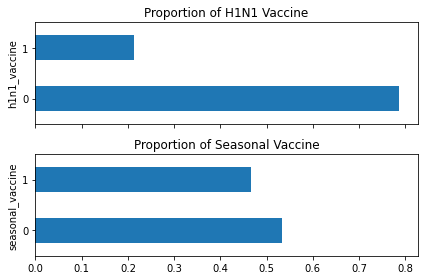

In [ ]:
fig, ax = plt.subplots(2, 1, sharex=True)

n_obs = labels_df.shape[0]

(labels_df['h1n1_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proportion of H1N1 Vaccine", ax=ax[0])
)
ax[0].set_ylabel("h1n1_vaccine")

(labels_df['seasonal_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proportion of Seasonal Vaccine", ax=ax[1])
)
ax[1].set_ylabel("seasonal_vaccine")

fig.tight_layout()

In [ ]:
#It looks like roughy half of people received the seasonal flu vaccine, but only about 20% of people received the H1N1 flu vaccine. In terms of class balance, we say that the seasonal flu vaccine target has balanced classes, but the H1N1 flu vaccine target has moderately imbalanced classes.

In [ ]:
#are the two target variables independent?

pd.crosstab(
    labels_df["h1n1_vaccine"], 
    labels_df["seasonal_vaccine"], 
    margins=True,
    normalize=True
)

seasonal_vaccine,0,1,All
h1n1_vaccine,,,
0,0.497810,0.289737,0.787546
1,0.036582,0.175871,0.212454
All,0.534392,0.465608,1.000000


In [ ]:
# Phi Coefficient is the same as Pearson for two binary variables
(labels_df["h1n1_vaccine"]
     .corr(labels_df["seasonal_vaccine"], method="pearson")
)

0.3771426530614447

In [ ]:
#phi coefficient of 0.37 is a moderate positive correlation
#Most people who got an H1N1 flu vaccine also got the seasonal flu vaccine. 
#While a minority of people who got the seasonal vaccine got the H1N1 vaccine, they got the H1N1 vaccine at a higher rate than those who did not get the seasonal vaccine.

In [ ]:
joined_df = features_df.join(labels_df)
#joined_df = features_df.join(labels_df.set_index('respondent_id'),on='respondent_id')
print(joined_df.shape)
joined_df.head()


(26707, 37)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [ ]:
corr_matrix = joined_df.corr()

In [ ]:
corr_matrix["h1n1_vaccine"].sort_values(ascending=False)

h1n1_vaccine                   1.000000
doctor_recc_h1n1               0.393890
seasonal_vaccine               0.377143
opinion_h1n1_risk              0.323265
opinion_h1n1_vacc_effective    0.269347
opinion_seas_risk              0.258571
doctor_recc_seasonal           0.209864
opinion_seas_vacc_effective    0.179272
health_worker                  0.169768
h1n1_concern                   0.121929
health_insurance               0.121170
h1n1_knowledge                 0.117951
chronic_med_condition          0.095207
opinion_h1n1_sick_from_vacc    0.075091
behavioral_wash_hands          0.074712
behavioral_touch_face          0.071648
behavioral_face_mask           0.070498
child_under_6_months           0.066962
behavioral_avoidance           0.047690
behavioral_antiviral_meds      0.040608
behavioral_outside_home        0.021768
behavioral_large_gatherings    0.017822
opinion_seas_sick_from_vacc    0.008360
household_adults               0.007545
household_children            -0.003320


In [ ]:
corr_matrix["seasonal_vaccine"].sort_values(ascending=False)

seasonal_vaccine               1.000000
opinion_seas_risk              0.390106
h1n1_vaccine                   0.377143
doctor_recc_seasonal           0.369190
opinion_seas_vacc_effective    0.361875
opinion_h1n1_risk              0.216625
opinion_h1n1_vacc_effective    0.205072
health_insurance               0.200858
doctor_recc_h1n1               0.198607
chronic_med_condition          0.170174
h1n1_concern                   0.154828
health_worker                  0.127311
behavioral_touch_face          0.120228
h1n1_knowledge                 0.120152
behavioral_wash_hands          0.112414
behavioral_avoidance           0.076395
behavioral_large_gatherings    0.064025
behavioral_outside_home        0.053509
behavioral_face_mask           0.050083
opinion_h1n1_sick_from_vacc    0.027404
child_under_6_months           0.012097
behavioral_antiviral_meds      0.006277
opinion_seas_sick_from_vacc   -0.061510
household_adults              -0.064840
household_children            -0.114614


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier

from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, roc_auc_score

RANDOM_SEED = 6    # Set a random seed for reproducibility!

In [ ]:
features_df.dtypes != "object"

h1n1_concern                    True
h1n1_knowledge                  True
behavioral_antiviral_meds       True
behavioral_avoidance            True
behavioral_face_mask            True
behavioral_wash_hands           True
behavioral_large_gatherings     True
behavioral_outside_home         True
behavioral_touch_face           True
doctor_recc_h1n1                True
doctor_recc_seasonal            True
chronic_med_condition           True
child_under_6_months            True
health_worker                   True
health_insurance                True
opinion_h1n1_vacc_effective     True
opinion_h1n1_risk               True
opinion_h1n1_sick_from_vacc     True
opinion_seas_vacc_effective     True
opinion_seas_risk               True
opinion_seas_sick_from_vacc     True
age_group                      False
education                      False
race                           False
sex                            False
income_poverty                 False
marital_status                 False
r

In [ ]:
numeric_cols = features_df.columns[features_df.dtypes != "object"].values
print(numeric_cols)

['h1n1_concern' 'h1n1_knowledge' 'behavioral_antiviral_meds'
 'behavioral_avoidance' 'behavioral_face_mask' 'behavioral_wash_hands'
 'behavioral_large_gatherings' 'behavioral_outside_home'
 'behavioral_touch_face' 'doctor_recc_h1n1' 'doctor_recc_seasonal'
 'chronic_med_condition' 'child_under_6_months' 'health_worker'
 'health_insurance' 'opinion_h1n1_vacc_effective' 'opinion_h1n1_risk'
 'opinion_h1n1_sick_from_vacc' 'opinion_seas_vacc_effective'
 'opinion_seas_risk' 'opinion_seas_sick_from_vacc' 'household_adults'
 'household_children']


In [ ]:
categorical_cols = features_df.columns[features_df.dtypes == "object"].values
print(categorical_cols)

['age_group' 'education' 'race' 'sex' 'income_poverty' 'marital_status'
 'rent_or_own' 'employment_status' 'hhs_geo_region' 'census_msa'
 'employment_industry' 'employment_occupation']


In [ ]:
#chain preprocessing into a Pipeline object
#each step is a tuple of (name you chose, sklearn transformer)

#changed to mean from most frequent
numeric_preprocessing_steps = Pipeline([
    ('standard_scaler', StandardScaler()),
    ('simple_imputer', SimpleImputer(strategy='mean'))
])

categorical_preprocessing_steps = Pipeline([
      ('encoder', OneHotEncoder(handle_unknown='ignore')),
      ])

#create the preprocessor stage of final pipeline
#each entry in the transformer list is a tuple of
#(name you choose, sklearn transformer, list of columns)


preprocessor = Pipeline(steps=[
    ('ct', ColumnTransformer(
    transformers = [
        ("numeric", numeric_preprocessing_steps, numeric_cols),
        ('cat', categorical_preprocessing_steps, categorical_cols)],
        remainder = "passthrough",
        sparse_threshold=0)),
])

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_validate

In [ ]:
#features_df[categorical_cols] = features_df[categorical_cols].astype('category')
#cat_col = features_df.select_dtypes('object').columns.tolist()

#what changed from July6: is_unbalance:false, max_depth 8, num_leaves 72
# max_depth 10, num_leaves 82

params = {
      'objective': 'binary',
      'metric': 'multi_auc',
      "cat_l2": 10,
      "cat_smooth": 10,
      "colsample_bytree": 0.8,
      "feature_fraction_bynode":  0.8,
      "learning_rate": 0.03,
      "max_depth": 10,
      "min_child_samples": 63,
      "min_data_per_group": 100,
      "n_estimators":200,
      "num_leaves": 82,
      "path_smooth": 0,
      "reg_alpha":  0.05,
      "reg_lambda": 0.05,
      "subsample_freq": 1,
      "subsample": 0.8,
      "max_bin": 122,
      "extra_trees": False,
      "is_unbalance": False,
      "boosting_type": 'gbdt',
      "n_jobs": 1,
      "verbosity": -1,
      "seed": 42,
}
        
#fit_params= {
 #   'feature_name': "auto",
  #  'categorical_feature': categorical_cols,
#}

#search_params = {}


In [ ]:
#neptune.ai/blog/lightgbm-parameters-guide
#boosting type = gradient boosted decision trees


In [ ]:
estimators = MultiOutputClassifier(LGBMClassifier(**params))

print_feat(feat_imp = pd.Series(estimators.feature_importances_, index=features_df.columns)),
    (feat_imp.nlargest(30).plot(kind='barh', figsize=(8,10))

In [ ]:
full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimators", estimators),
])

In [ ]:
X_train, X_eval, y_train, y_eval = train_test_split(
    features_df,
    labels_df,
    test_size=0.2,
    shuffle=True,
    stratify=labels_df,
    random_state=42
)

In [ ]:
%%time

# Train model
full_pipeline.fit(X_train, y_train)



None   # So we don't print out the whole pipeline representation

Wall time: 1.79 s


In [ ]:
# Predict on evaluation set
# This competition wants probabilities, not labels

preds = full_pipeline.predict_proba(X_eval)
preds


[array([[0.98682949, 0.01317051],
        [0.50491807, 0.49508193],
        [0.95287399, 0.04712601],
        ...,
        [0.96280648, 0.03719352],
        [0.54421149, 0.45578851],
        [0.70453621, 0.29546379]]),
 array([[0.66547035, 0.33452965],
        [0.19323907, 0.80676093],
        [0.94162959, 0.05837041],
        ...,
        [0.88875432, 0.11124568],
        [0.41856599, 0.58143401],
        [0.47937276, 0.52062724]])]

In [ ]:
print("test_probas[0].shape", preds[0].shape)
print("test_probas[1].shape", preds[1].shape)

test_probas[0].shape (5342, 2)
test_probas[1].shape (5342, 2)


In [ ]:
y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": preds[0][:, 1],
        "seasonal_vaccine": preds[1][:, 1],
    },
    index = y_eval.index
)
print("y_preds.shape:", y_preds.shape)
y_preds.head()

y_preds.shape: (5342, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
22317,0.013171,0.334530
1215,0.495082,0.806761
10540,0.047126,0.058370
7407,0.184026,0.270370
14697,0.093778,0.206626


In [ ]:
def plot_roc(y_true, y_score, label_name, ax):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    ax.plot(fpr, tpr)
    ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
    ax.set_ylabel('TPR')
    ax.set_xlabel('FPR')
    ax.set_title(
        f"{label_name}: AUC = {roc_auc_score(y_true, y_score):.4f}"
    )

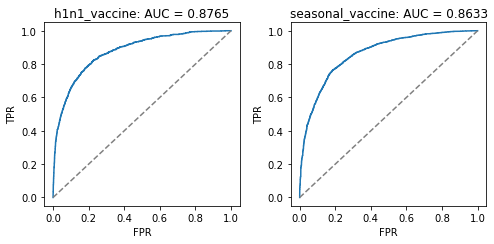

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))

plot_roc(
    y_eval['h1n1_vaccine'], 
    y_preds['h1n1_vaccine'], 
    'h1n1_vaccine',
    ax=ax[0]
)
plot_roc(
    y_eval['seasonal_vaccine'], 
    y_preds['seasonal_vaccine'], 
    'seasonal_vaccine',
    ax=ax[1]
)
fig.tight_layout()

In [ ]:
roc_auc_score(y_eval, y_preds)

0.8698892622088569

In [ ]:
#0.8698892622088569 num_leaves to 82, max_depth 10
#0.8697263774020288 num_leaves to 72, max_depth 8
#0.8695796079604736 is_unbalance= False
#0.8690751996504833 mean
#0.8527496971858513 (split match sandbox plus the extra fields from baseline)
#0.852128736376434 (when change train test split exact match to sandbox settings)

In [ ]:
%%time 

full_pipeline.fit(features_df, labels_df)

None

Wall time: 2.2 s


In [ ]:
test_features_df = pd.read_csv(DATA_PATH / "test_set_features.csv", 
                               index_col="respondent_id")

In [ ]:
test_probas = full_pipeline.predict_proba(test_features_df)
test_probas

[array([[0.85967047, 0.14032953],
        [0.97038505, 0.02961495],
        [0.7543349 , 0.2456651 ],
        ...,
        [0.84310993, 0.15689007],
        [0.9798461 , 0.0201539 ],
        [0.36048119, 0.63951881]]),
 array([[0.76874172, 0.23125828],
        [0.96271342, 0.03728658],
        [0.31055134, 0.68944866],
        ...,
        [0.82641298, 0.17358702],
        [0.6953423 , 0.3046577 ],
        [0.40632751, 0.59367249]])]

In [ ]:
submission_df = pd.read_csv(DATA_PATH / "submission_format.csv", 
                            index_col="respondent_id")

In [ ]:
submission_df.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.5,0.7
26708,0.5,0.7
26709,0.5,0.7
26710,0.5,0.7
26711,0.5,0.7


In [ ]:
# Make sure we have the rows in the same order
np.testing.assert_array_equal(test_features_df.index.values, 
                              submission_df.index.values)

# Save predictions to submission data frame
submission_df["h1n1_vaccine"] = test_probas[0][:, 1]
submission_df["seasonal_vaccine"] = test_probas[1][:, 1]

submission_df.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.140330,0.231258
26708,0.029615,0.037287
26709,0.245665,0.689449
26710,0.741402,0.905098
26711,0.306600,0.432156


In [ ]:
submission_df.to_csv('my_submissionLGBM v2 July10 Clean Jul11.csv', index=True)